#  Центральная предельная теорема своими руками

In [9]:
!jt -l
!jt -t grade3

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
for i in range(10):
    print("Hey!")

Hey!
Hey!
Hey!
Hey!
Hey!
Hey!
Hey!
Hey!
Hey!
Hey!


## Выбор распределения и генерация выборки  

Для реализации текущей задачи было выбрано распределение Парета, удолетворяющее требованиям непрерывности и непохожести на нормальное, ьем не менее достаточно применяемое в экономике, теории вероятности и ряде другух дисциплин, чтобы быть узнаваемым.

Распределение Парето должно быть больше нуля и не ограничено сверху. Это также известно как «правило 80-20». В этом распределении 80 процентов весов находятся в самых низких 20 процентах диапазона, в то время как другие 20 процентов заполняют оставшиеся 80 процентов диапазона.

Подробнее на [Вики](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9F%D0%B0%D1%80%D0%B5%D1%82%D0%BE)

In [13]:
k = 3 # коэфициент кривизны
pareto = sts.pareto(k)
sample = pareto.rvs(1000) # генерим случайную выборку 1000 значений

Отобразим гистограмму выборок вместе с функцией плотности вероятности:

Вместо normed=True будет использован density=True


*MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")*

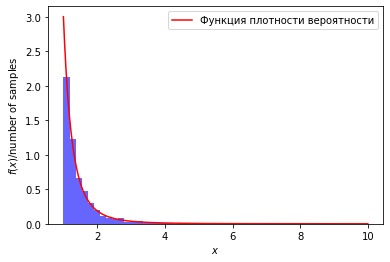

Hey!
Hey!
Hey!
Hey!
Hey!
Hey!
Hey!
Hey!
Hey!
Hey!


In [16]:
x = np.linspace(1,10,1000) # определяем массив точек для построения плотности распределения
pdf = pareto.pdf(x)#вычисляем значения плотности распределения от выборки
#строим гистрограмму выборки и теоретическую функцию распределения
plt.plot(x, pdf, label='Функция плотности вероятности', color='red')
plt.hist(sample, bins =50, range=(1,10), density=True, color='blue', alpha=0.6)
plt.ylabel('$f(x)$/number of samples')
plt.xlabel('$x$')
plt.legend(loc='best')
plt.show()
for i in range(10):
    print("Hey!")

## Оценка распределения выборочного среднего 



Предварительно определим формулы нахождения значений среднего и дисперсии

$E \lbrack X \rbrack = \frac{x(m)k}{k-1} $  - среднее, где $x(m)$ - это миниальное значение (наше b) , а $k$ - коэфициент кривизны (a)  
$ D \lbrack X \rbrack = (\frac{x(m)}{k-1})^2\cdot  (\frac{k}{k-2}) $


In [6]:
xm = min(x) #минимальное значение 
E = (xm*k)/(k-1)
D = (((xm)/(k-1))**2)*(k/(k-2))
print('{} - среднее значение, {} - дисперсия'.format(E, D))

1.5 - среднее значение, 0.75 - дисперсия


Определим функцию, генерирующую 1000 выборок объема n, считающую среднее для каждой из них и формирующая график

In [7]:
def get_1000sample(n):
  samples = [pareto.rvs(n).mean() for i in range(1000)]
  mu, std = sts.norm.fit(samples)
  plt.hist(samples, bins=25, density=True, alpha=0.6, color='b')
  # Теперь плотность.
  xmin, xmax = plt.xlim()
  x = np.linspace(xmin, xmax, 100)
  p = sts.norm.pdf(x, mu, std)
  plt.plot(x, p, 'red', linewidth=2)
  title = 'Среднее значение = {}'.format(mu)
  plt.title(title)
  plt.show()


## Расчет для выборок c разными объемами

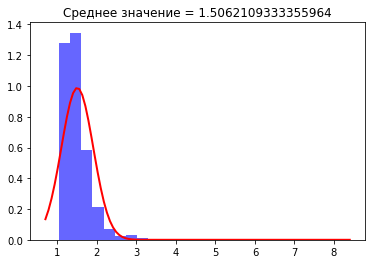

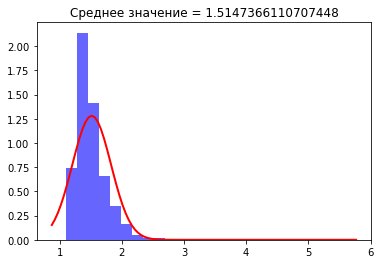

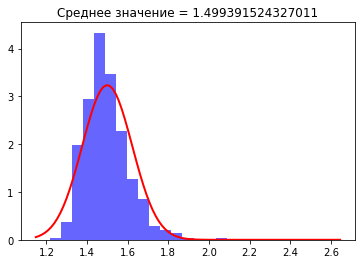

In [8]:
for n in [5, 10, 50]:
  get_1000sample(n)

## Вывод

Значения средних практически с первой выборки при расчете вручную стали соответсвтовать теоретическим расчетам, что верно соотносится с формулировкой центральной предельной теоремы и этот факт приводит к тому, что обьем выборки не так важен и можно ориентироваться на меньшее значение, дисперсия же в свою очередь уменьшается с ростом выборки, что можно увидеть по графикам, в свою очередь подтверждая ЦПТ